Anggota Kelompok 20 Data Science
- AKBAR MUJADDID
- Ari Fitria
- AURELIA ZAFIRA PUTRI
- NADINI MARDIAH YASEN
- ZULVAN TARIQ HANDITRINANTA

Link Google Colab  :
https://colab.research.google.com/drive/1pFkB9uBG8oyfkCqO2_t5CdYp9X0yTAgO?usp=sharing

# **Import Library**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization

#**Read Data**

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/ManusiaHiu/MP-Group4/master/Dataset/Iris.csv')
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#total rows and colums in the dataset
dataset.shape

(150, 6)

In [ ]:
dataset.info() # there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Missing values computation

In [ ]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Feature selection for the model

Pada studi kasus kali ini hanya menggunakan 2 variabel, yaitu: Annual income dan Spending Score

In [ ]:
#Mengambil hanya 2 fitur (Pendapatan Tahunan dan Skor Pengeluaran) dan Label tidak tersedia
X= dataset.iloc[:, [3,4]].values

## Membangun Model

Algoritma KMeans untuk menentukan jumlah cluster yang optimal , KMeans menggunakan Metode Elbow


In [ ]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# **Visualizing the ELBOW method to get the optimal value of K**

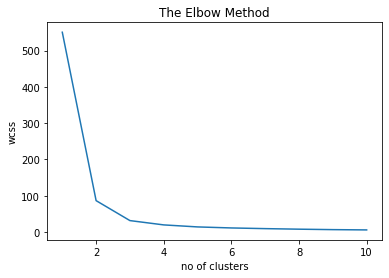

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [110]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also it will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

## **Visualizing all the clusters**

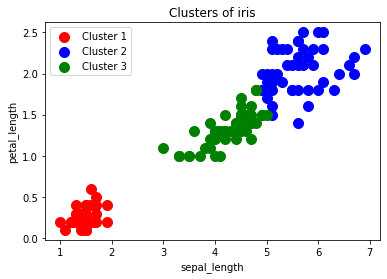

In [112]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of iris')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()

## **Model Interpretation**

*   Cluster 1 (Red Color): nilai petal_length dan petal_width rendah
*   Cluster 2 (Blue Color): nilai petal_length dan petal_width menengah
*   Cluster 2 (Blue Color): nilai petal_length dan petal_width tinggi



Insight: cluster 1 memiliki nilai nilai petal_length dan petal_width lebih rendah dibandingkan dengan cluster 2